### Goal

In this notebook, we explore binning and smoothing spike trains. This is very useful when we have experimental spike data that we want to visualize or even predict using models.

In [1]:
import torch
import matplotlib.pyplot as plt

from brainbox import spiking

%load_ext autoreload
%autoreload 2

In [2]:
# Let's generate some synthetic spike data
def generate_spikes(b, n, t_len):
    torch.manual_seed(20)
    example_spikes = torch.rand(b, n, t_len)
    example_spikes[example_spikes > 0.9] = 1
    example_spikes[example_spikes < 1] = 0
    
    return example_spikes
    
spike_trains = generate_spikes(1, n=100, t_len=1000)  # of shape b x n x t

In [3]:
# Here, we bin spikes over 200ms duration where each bin=8ms (total duration 1000 bins = 8s)
binned_spikes = spiking.bin_spikes(spike_trains, dt=8, window_dt=200)
smoothed_binned_spikes = spiking.bin_spikes(spike_trains, dt=8, window_dt=200, gaussian=True, sigma=10)
# You can pass further arguments to the above functions:
# stride_dt - make the sliding window slide at stride_dt rather than dt
# pad_input - to ensure the time dimension remains the same by zero padding the beginning

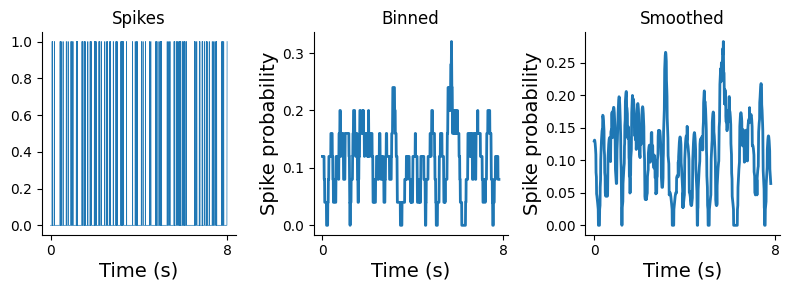

In [4]:
def plot_fr(title, fr, lw, ax):
    ax.plot(fr, linewidth=lw)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_title(title)
    ax.set_xlabel("Time (s)", fontsize=14, labelpad=2)
    ax.set_xticks([0, 1000])
    ax.set_xticklabels([0, 8])
    
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

b, neuron_idx = 0, 0
plot_fr("Spikes", spike_trains[b, neuron_idx], 0.5, axs[0])
plot_fr("Binned", binned_spikes[b, neuron_idx], 2, axs[1])
plot_fr("Smoothed", smoothed_binned_spikes[b, neuron_idx], 2, axs[2])
axs[1].set_ylabel("Spike probability", fontsize=14, labelpad=2)
axs[2].set_ylabel("Spike probability", fontsize=14, labelpad=2)
fig.tight_layout()
# Note: You can calculate the firing rate (Hz) by m 